# Learning Theory Homework 
***
**Name**: $<$insert name here$>$ 
***

This assignment is due on Moodle by **5pm on Friday March 9th**. Submit only this Jupyter notebook to Moodle. Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/CSCI5622-Machine-Learning/blob/master/resources/syllabus.md#collaboration-policy)



## Overview 
***

In this assignment you will explore the concepts of PAC learnability and VC dimension. 


### [15 points] Problem 1: 
***

Consider the class C of concepts defined by triangles with **distinct** vertices of the form $(i, j)$ where $i$ and $j$ are integers in the interval $[0,99]$. A concept c labels points on the interior and boundary of the associated triangle as positive and points exterior to the triangle as negative.

**Note**: To make life easier, we'll allow degenerate triangles in $C$. That is, triangles where the vertices are collinear. The following image depicts an example of a nondegenerate and a degenerate triangle.

<img src="figs/triangles.png" width=400 height=50>  

**Part A**: Suppose we have an algorithm that produces a consistent $h$ from the hypothesis class $H = C$. Give a bound on the number of training examples sufficient to assure that for any target concept $c$ in $C$, our algorithm will, with probability $1-\delta$, output a hypothesis $h$ with generalization error at most $\epsilon$.

**A:**  
In this example, we are given that $h$ is consistent and we also know that the vertices are integers, so we know this comes from the **consistent hypothesis, finite spaces** class.  Therefore, the minimum number of training examples can be given by:  

$$
m >= \frac{1}{\epsilon}\left[ln|H|~+~ln\left(\frac{1}{\delta}\right)\right]
$$

**Part B**: Based on your bound in **Part A**, determine the minimum number of training examples necessary such that for any target concept $c$ in $C$, our algorithm will, with probability $0.95$, output a hypothesis $h$ with generalization error at most $0.15$.  

**A:**  
Using $Pr\left[R(h)<=\epsilon \right] >= 1-\delta = 0.95$, we can say $\delta = 0.05$.  We now just need to solve for the cardinality of $H$.  For the above specified case, the we have: $num_{points} = 100*100 = 10,000$.  We are simply choosing three distinct points, then taking the natural log:

$$
ln \left[{{10000}\choose{3}} \right] \approx 25.83
$$

$$
m >= \frac{1}{0.15}\left[ln \left[{{10000}\choose{3}} \right]~+~ln\left(\frac{1}{0.05}\right)\right] = 192.23
$$

Therefore, we need $m >= 193$ training examples.

### [15 points] Problem 2: 
***

Consider feature vectors that live in two-dimensional space and the class of hypotheses defined by circles **centered at the origin**. There are two different kinds of hypotheses $h$ in this class. One type of hypthesis classifies points as positive if they lie on the boundary or **interior** of the circle, and negative otherwise. The other type of hypothesis classifies points as positive if they lie on the boundary or **exterior** of the circle, and negative otherwise. State and prove (rigorously) the VC dimension of this family of classifiers.

### [20 points] Problem 3: Empirical Verification of PAC Bounds for Axis-Aligned Rectangles 
***

In the in-class notebook associated with PAC Learnability, we proved a PAC bound for the class of concepts $C$ comprised of axis-aligned rectangles living in $\mathbb{R}^2$ of the form $(a \leq x \leq b) \wedge (c \leq y \leq d)$ where $a, b, c, d$ are real numbers. Specifically, we proved that with probability $1-\delta$, any consistent learner could learn a hypothesis $h$ in $H = C$ with generalization error less than $\epsilon$ provided that the number of training examples satisfied 

$$
m > \frac{4}{\epsilon}\log\frac{4}{\delta}
$$

In this problem you will empirically verify this bound for the restricted concept class $C$ where the rectangles are defined by $(a \leq x \leq b) \wedge (c \leq y \leq d)$ where $a, b, c, d$ are real numbers satisfying $0 \leq a \leq b \leq 100$ and $0 \leq c \leq d \leq 100$. 

**Part A**: The following is a general outline of how you should accomplish this, but it is up to you how you organize your code. 

- Write some code that randomly generates a concept rectangle $c$. 



- Write some code that, given feature vectors of length-2, labels them according to some rectangle (that is, labels a point positive if the point is on the boundary or interior of the rectangle, and negative otherwise).  



- Write some code that, given training examples of length-2, and labeled according to a concept $c$, returns a consistent hypothesis rectangle $h$. 



- Write some code that generates a training set of size $m$, labels them according to a random concept $c$, learns a consistent hypothesis $h$, and then approximates the generalization error by predicting on $1000$ new examples from the same distribution as the training data. 


- Write some code that computes approximate generalization errors for $100$ independent concepts $c$ and associated training sets of size $m$, and returns the worst-case generalization error at the confidence level $1-\delta$.  One way to do this in the case that say $\delta = 0.05$, is to report the $95^\textrm{th}$ percentile of the $100$ samples of the generalization error. We can then say that, in our simulation, $100(1-\delta)\%$ of our observed generalization errors were less than our computed value. (**Bonus**: If your code is efficient, try increasing the number of runs in the simulation to $500$. This should give you a better approximation of the generalization error.) 

In [517]:
import numpy as np
import random
import matplotlib.pyplot as plt
import sys
%matplotlib inline

In [667]:
class CalcPAC():
    '''
    params: min_, max_ are the bounds from which random points will be generated
    param: m_training is the number of training examples
    param: m_testing is the number of testing examples
    '''
    def __init__(self, min_, max_, m_training, m_testing):
        self.min_ = min_
        self.max_ = max_
        self.m_training = m_training
        self.m_testing = m_testing
        
    def gen_random_points(self, training = True):
        '''
        produces an array of randomly distributed [x,y] pairs
        '''
        x = []
        y = []
        
        # The number of points used for training and testing will be different
        if training:
            num_points = self.m_training
        else:
            num_points = self.m_testing
        
        # Continue generating [x,y] points from the distribution defined
        # by the min_ and max_ bounds
        while len(x) < num_points:
            x.append(random.uniform(self.min_, self.max_))
            y.append(random.uniform(self.min_, self.max_))
            
        # Return a numpy array of [x,y] coordinates
        if training:
            self.random_points_train = np.array(list(zip(x,y)))
        else:
            self.random_points_test = np.array(list(zip(x,y)))
        
    def gen_concept_rectangle(self):
        '''
        param: min_ is floating point number used for minimum bound
        param: max_ is floating point number used for maximum bound
        param: seed is integer used to seed random function

        return: an ordered np array of 4 points defining a rectangle from lower
        left point clockwise to lower right point
        '''

        x1 = random.uniform(self.min_, self.max_)
        y1 = random.uniform(self.min_, self.max_)
        x2 = random.uniform(self.min_, self.max_)
        y2 = random.uniform(self.min_, self.max_)

        # Don't allow points to be equivalent
        while x1 == x2:
            x2 = random.uniform(self.min_, self.max_)
        while y1 == y2:
            y2 = random.uniform(self.min_, self.max_)

        # Order points intuitively
        if not x1 < x2:
            x11 = x2
            x2 = x1
            x1 = x11

        if not y1 < y2:
            y11 = y2
            y2 = y1
            y1 = y11
        
        # Define the concept class minimum and maximum values for x and y
        self.c_x_min, self.c_x_max = [x1, x2]
        self.c_y_min, self.c_y_max = [y1, y2]
        self.concept_rec = np.array([[x1,y1],[x1,y2],[x2,y2],[x2,y1]])

    def label_maker(self, training = True):
        '''
        param: rectangle is an ordered np array of 4 points defining a rectangle from lower
        left point clockwise to lower right point

        param: points is a two-column np.array[[x1,y1],[x2,y2]...]

        returns: np.array of ints with [x, y, class] with class = {-1,1}
        '''
        new = []
        if training:
            # TRAINING point labels
            self.labeled_train = self.real_label_maker(self.concept_rec, self.random_points_train)
            
        else:
            # HYPOTHESIS of point labels
            self.h_labeled_test = self.real_label_maker(self.hypothesis_rec, self.random_points_test)
            
            # CONCEPT i.e. ground truth of point labels
            self.c_labeled_test = self.real_label_maker(self.concept_rec, self.random_points_test)
            
    def real_label_maker(self, rect, array):
        '''
        pass in a rectangle defining the bounds and an array of points to be classified
        '''
        new = []
        
        # Extract min and max values for rectangular array
        x_min, y_min = np.amin(rect, axis = 0)
        x_max, y_max = np.amax(rect, axis = 0)

        # Classify array of [x,y] points based on bounds of rectangle
        for row in range(0, len(array)):
            if x_min <= array[row][0] and array[row][0] <= x_max:
                if y_min <= array[row][1] and array[row][1] <= y_max:
                    new.append(1)
                else:
                    new.append(-1)
            else:
                new.append(-1)

        # Return a numpy array of [[x1,y1,class1],[x2,y2,class2]...n] 
        new = np.array([new])
        return np.append(array, new.T, axis=1)
        
    def hypothesis_rectangle(self):
        '''
        param: labeled is a np.array of ints with [x, y, class]

        returns: an ordered np array of 4 points defining a rectangle from lower
        left point clockwise to lower right point
        '''

        # The hypothesis rectangle will always be constructed from the TRAINING points
        pos_points = self.labeled_train[self.labeled_train[:,2] == 1]

        # make sure there is at least 1 positively labeled point in the pos_points array
        try:
            self.h_x_min, self.h_y_min, _ = np.amin(pos_points, axis = 0)
            self.h_x_max, self.h_y_max, _ = np.amax(pos_points, axis = 0)
        except ValueError as e:
            print('There are {} positively labeled points, '
            'therefore, a hypothesis rectange could not be created.\n'
            'The error is: {}'.format(len(pos_points), e))
            sys.exit(1)

        self.hypothesis_rec =  np.array([[self.h_x_min, self.h_y_min],[self.h_x_min, self.h_y_max],
                                         [self.h_x_max, self.h_y_max],[self.h_x_max,self.h_y_min]])

    def calc_percent_captured(self):
        '''
        h refers to the hypothesized
        c refers to the concept 
        '''   
        
        # This function calculates the proportion of the concept rectangle
        # captured by the hypothesis rectangle
        h_rect_area = (self.h_x_max - self.h_x_min) * (self.h_y_max - self.h_y_min)
        c_rect_area = (self.c_x_max - self.c_x_min) * (self.c_y_max - self.c_y_min)

        self.perc_captured = h_rect_area / c_rect_area
    
    def approx_gen_error(self):
        # approximate the generalization error by looking at the number of incorrect
        # divided by the total number of points classified
        
        incorrect = self.c_labeled_test[:,2] != self.h_labeled_test[:,2]
        total_examples = self.c_labeled_test.shape[0]
        return sum(incorrect)/(total_examples)
    

In [676]:
a = CalcPAC(0, 1000, 100, 50)
a.gen_random_points(training = True)
a.gen_concept_rectangle()
a.label_maker(training = True)
a.hypothesis_rectangle()
a.gen_random_points(training = False)
a.label_maker(training = False)
a.approx_gen_error()

# correct = a.c_labeled_test[:,2] == a.h_labeled_test[:,2]
# print(correct)
# print(sum(correct))

There are 0 positively labeled points, therefore, a hypothesis rectange could not be created.
The error is: zero-size array to reduction operation minimum which has no identity


SystemExit: 1

/Users/corymosiman/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2870: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [539]:
percent_captured = []
for size in range(100, 10000, 100):
    a = CalcPAC(0, 100, 1000, )
    a.gen_random_points(size)
    a.gen_concept_rectangle()
    a.label_maker()
    a.hypothesis_rectangle()
    a.calc_percent_captured()
    percent_captured.append([size, a.perc_captured])

percent_captured = np.array([percent_captured])
# print(percent_captured)

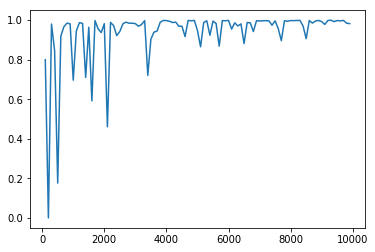

In [540]:
# percent_captured[0]
plt.clf()
plt.plot(*percent_captured.T)
plt.show()

(1000, 2) <class 'numpy.ndarray'>
[[ 30.02273663   7.92962284]
 [ 30.02273663  15.98830587]
 [ 78.34193899  15.98830587]
 [ 78.34193899   7.92962284]]
[[ 33.06115456   8.3495489 ]
 [ 33.06115456  15.95397052]
 [ 76.80731669  15.95397052]
 [ 76.80731669   8.3495489 ]]


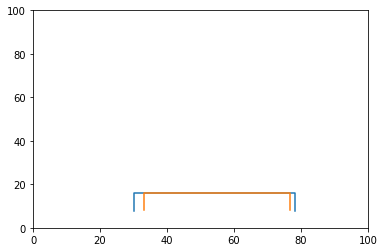

In [448]:
rec = random_rectangle(0,100)
points = random_points(0,100, 1000)
print(points.shape, type(points))
labeled = label_maker(rec, points)
hypothesis = hypothesis_rectangle(labeled)
print(rec)
print(hypothesis)
plt.plot( *rec.T)
plt.plot( *hypothesis.T)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

[[ 53.25202638  56.56446254]
 [ 53.25202638  91.9773378 ]
 [ 67.3774116   91.9773378 ]
 [ 67.3774116   56.56446254]]
[[ 53.42968284  58.72316982]
 [ 53.42968284  91.63154964]
 [ 67.26173135  91.63154964]
 [ 67.26173135  58.72316982]]


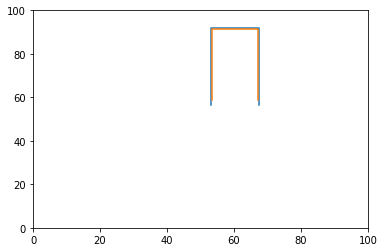

In [316]:
# test to see if points returned by random_points are outside of bounds
a = random_rectangle(0,100)
x_min, y_min = np.amin(a, axis = 0)
x_max, y_max = np.amax(a, axis = 0)
print([[x_min, x_max],[y_min, y_max]])

[[8.0968701744110412, 98.050998286171804], [68.3326858450787, 71.194903361978092]]


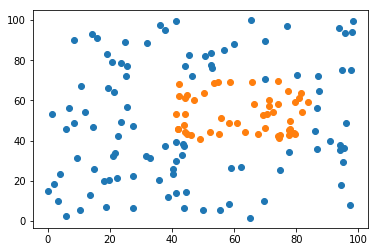

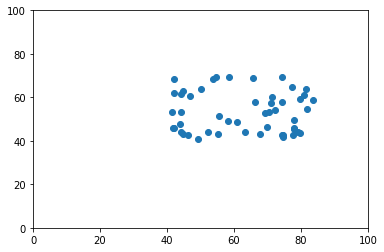

In [343]:
a = random_rectangle(0,100)
x_min, y_min = np.amin(a, axis = 0)
x_max, y_max = np.amax(a, axis = 0)
exterior = random_points([x_min,x_max],[y_min,y_max], 0, 100, 100)
interior = random_points([x_min,x_max],[y_min,y_max], 0, 100, 50, inside = True)
# fig, ax = plt.figure
plt.scatter( *exterior.T) # used to plot a 2-column np.array of x,y pairs
plt.scatter( *interior.T)
plt.show()
plt.clf()
plt.scatter(*interior.T)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

In [325]:
min_ = 0.0
max_ = 100.0
# seed = 12
a = random_rectangle(min_, max_)
labeled = label_maker(a, [24,16])
print(labeled)
print(type(labeled))
print(labeled[0])

[24 16 -1]
<class 'numpy.ndarray'>
24


In [210]:
a = random_rectangle(min_, max_)
print(a)
labeled = label_maker(a, [24,16])
print(labeled)
print(type(labeled))
print(labeled[0])
print(type(labeled[0]))

[[ 13.5416238    6.617831  ]
 [ 13.5416238   17.39062736]
 [ 71.36189563  17.39062736]
 [ 71.36189563   6.617831  ]]
[24 16  1]
<class 'numpy.ndarray'>
24
<class 'numpy.int64'>


In [180]:
a = [1, 'sdfl']
b = np.array(a)
print(b)

['1' 'sdfl']


In [17]:
x_min, y_min = np.amin(rectangle, axis = 0)
x_max, y_max = np.amax(rectangle, axis = 0)

14.260035292536777

**Part B**: Use your code to estimate the generalization error with confidence parameter $\delta=0.05$ for training sets of size $m$ where $m = 250, 500, 1000, 1250,$ and $1500$ and the data are comprised of points $(x,y)$ where the $x$- and $y$-values are sampled from the continuous uniform distribution $\textrm{unif}(0,100)$. Make a **log-log** plot with $m$ on the horizontal axes and $\epsilon$ on the vertical axis.  Additionally, overlay the theoretical PAC bound on your graph and discuss your results. 

**Part C**: Repeat **Part B** where the data are comprised of points $(x,y)$ where the $x$- and $y$-values are sampled from the normal distribution with mean $\mu = 50$ and standard deviation $\sigma = 25$. Again, overlay the theoretical PAC bound on your graph and discuss your results. Do you expect to observe very different results than those observed in **Part B**?  

<br><br><br><br>
<br><br><br><br>
<br><br><br><br>
<br><br><br><br>
<br><br><br><br>
<br><br><br><br>
# Leftovers

In [ ]:
def random_points_bounded(x_bounds, y_bounds, min_, max_, num_points, inside = False):
    '''
    param: x_bounds is list of [x_min, x_max]
    param: y_bounds is list of [y_min, y_max]
    param: min_ minimum x and y bound
    param: max_ maximum x and y bound
    param: num_points is total number of points to generate
    
    This funtion will return a np.array of [x,y] pairs that are within the bounds 
    specified by min_ and max_ but EXCLUDING the rectangle defined by the bounds
    of x_bounds and y_bounds
    '''
    x = []
    y = []
    if not inside:
        while len(x) < num_points:
            x1 = random.uniform(min_, max_)
            if x1 < x_bounds[0] or x_bounds[1] < x1:
                x.append(x1)
                y1 = random.uniform(min_, max_)
                y.append(y1)
            else:
                y1 = random.uniform(min_, max_)
                while not y1 < y_bounds[0] and not y_bounds[1] < y1:
                    y1 = random.uniform(min_, max_)
                x.append(x1)
                y.append(y1)

        return np.array(list(zip(x,y)))
    
    else:
        while len(x) < num_points:
            x1 = random.uniform(x_bounds[0], x_bounds[1])
            y1 = random.uniform(y_bounds[0], y_bounds[1])
            x.append(x1)
            y.append(y1)
                
        return np.array(list(zip(x,y)))